# 넘파이 개요

- Numerical Python의 약자
- 고성능의 수치 해석용 python 라이브러리
- Numpy는 고성능 다차원 배열과 이런 배열을 처리하는 다양한 함수와 툴을 제공한다.
- Matrix와 Vector와 같은 연산에 최적화 되어 있다.
- 공식 사이트 : https://www.numpy.org

# Python 다차원 배열의 이해

## 숫자 자료형

In [1]:
# 세 명의 학생의 수학과목 점수 설정
math1 = 11
math2 = 22
math3 = 33

In [5]:
# 합과 평균 구하기
total = math1 + math2 + math3
average = total / 3
print(f'수학점수 합 : {total}')
print(f'평균 : {average:.2f}')

수학점수 합 : 66
평균 : 22.00


## 리스트 자료형

In [14]:
# math_list = [11, 22, 33]

total = 0
for math in math_list:
    total += math
average = total / len(math_list)
print(f'수학점수 합 : {total}')
print(f'평균 : {average:.2f}')

수학점수 합 : 110
평균 : 27.50


In [13]:
math_list.append(44)

- 시험문제에 오류가 발생돼서 모든 학생의 점수를 1점씩 올려줘야 하는 상황

In [16]:
math_list2 = [math + 1 for math in math_list]
# for math in math_list:
#     math_list2.append(math+1)
print(math_list2)

[12, 23, 34, 45]


- 여기서 구조를 확장해서
- 1반의 점수가 11, 12, 13
- 2반의 점수가 21, 22, 23
- 3반의 점수가 31, 32, 33
- 이러한 구조로 바뀌면 중첩 리스트로 변경해야 하고, 합과 평균을 구하는 로직도 변경이 돼야 한다.

## Numpy로 구현한 다차원 배열

- Numpy를 이용하면 중첩된 자료를 효율적으로 다룰 수 있다.
- 'import numpy as np' 형태로 사용하는 게 일반적이다.

In [19]:
import numpy as np

math_ndarray = np.array([[11, 12, 13],[21, 22, 23],[31, 32, 33]]) # 파이썬의 리스트를 다차원 배열로 만들어줌
print(math_ndarray)
print([[11, 12, 13],[21, 22, 23],[31, 32, 33]])
print(type(math_ndarray))

[[11 12 13]
 [21 22 23]
 [31 32 33]]
[[11, 12, 13], [21, 22, 23], [31, 32, 33]]
<class 'numpy.ndarray'>


In [20]:
# 각 원소에 1을 더하려면...
new_ndarray = math_ndarray + 1
print(new_ndarray)

[[12 13 14]
 [22 23 24]
 [32 33 34]]


In [21]:
print('합:',np.sum(new_ndarray))
print('평균:',np.mean(new_ndarray)) # 파이썬에는 평균을 구하는 함수는 없음 

합: 207
평균: 23.0


In [22]:
# 각 반의 평균(행 평균)
print('반별 평균:', np.mean(new_ndarray, axis = 1)) # axis는 축 옵션

반별 평균: [13. 23. 33.]


# Numpy의 axis(축) 정리

- 행렬의 모양을 다음과 같이 확인할 수 있다.
    - ndarray객체.shape
    - 1차원 벡터: (원소개수,)
    - 2차원 행렬: (행, 열)
    - 3차원 행렬: (깊이, 행, 열)
    - shape의 결과값을 기준으로 axis 값이 0부터 부여된다.
    - 2차원인 경우 axis=0 -> 행, axis=1 -> 열을 의미한다.
    - 3차원인 경우 axis=0 -> 깊이, axis=1 -> 행, axis=2 -> 열을 의미한다.
- 2차원 행렬의 축  
![2dims](2dims.png)
    - axis를 0 또는 -2로 하면 **행 축을 기준으로** 계산하라는 의미로 각 행에 있는 열의 값을 계산하여 하나의 값으로 만든다.
    - axis를 1 또는 -1로 하면 **열 축을 기준으로** 계산하라는 의미로 각 열에 있는 행의 값을 계산하여 하나의 값으로 만든다.
- 3차원 행렬의 축  
![3dims](3dims.png)
    - axis를 0 또는 -3으로 하면 **깊이를 기준으로** 계산하라는 의미로 서로 마주하는 요소끼리의 값을 계산하여 하나의 값으로 만든다.
    - axis를 1 또는 -2로 하면 **행 축을 기준으로** 계산하라는 의미로 각 행에 있는 열의 값을 계산하여 하나의 값으로 만든다
    - axis를 2 또는 -1으로 하면 **열 축을 기준으로** 계산하라는 의미로 각 열에 있는 행의 값을 계산하여 하나의 값으로 만든다.

In [2]:
import numpy as np

array1 = np.array([[1,2],[3,4]])
print(array1)
print(array1.shape)
print('-'*30)
array2 = np.array([[[1,2,3],
                   [4,5,6]],
                   
                   [[7,8,9],
                   [10,11,12]]])
print(array2)
print(array2.shape)

[[1 2]
 [3 4]]
(2, 2)
------------------------------
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
(2, 2, 3)


In [29]:
print('2차원 배열의 axis=0 기준 합: ', np.sum(array1, axis=0))
print('2차원 배열의 axis=1 기준 합: ', np.sum(array1, axis=1))
print('-' * 40)
print('3차원 배열의 axis=0 기준 합: ')
print(np.sum(array2, axis = 0))
print('3차원 배열의 axis=1 기준 합: ')
print(np.sum(array2, axis = 1))
print('3차원 배열의 axis=2 기준 합: ')
print(np.sum(array2, axis = 2))

2차원 배열의 axis=0 기준 합:  [4 6]
2차원 배열의 axis=1 기준 합:  [3 7]
----------------------------------------
3차원 배열의 axis=0 기준 합: 
[[ 8 10 12]
 [14 16 18]]
3차원 배열의 axis=1 기준 합: 
[[ 5  7  9]
 [17 19 21]]
3차원 배열의 axis=2 기준 합: 
[[ 6 15]
 [24 33]]


# Numpy 특징

## Numpy의 ndarray가 빠른 이유
- 동일한 연산일 경우 python에 비해 처리 속도가 빠름
- ndarray는 타입을 명시하여 원소의 배열로 데이터를 유지
  - 다차원 데이터도 연속된 메모리 공간이 할당됨

## Python의 list가 느린 이유
- 파이썬의 리스트는 포인터(메모리 참조값)의 배열로 데이터를 관리
- 경우에 따라서 각각 객체가 메모리 여기저기 흩어져 있음
    - 캐시(cache) 활용이 어려움  
![nsvp](numpy_vs_python.png)

In [5]:
ndarry = np.random.rand(1000,1000)
python_list = ndarry.tolist() # 넘파이의 다차원 배열을 파이썬 리스트로 바꿀 때

In [6]:
import time
print('Python의 list를 사용해서 모든 원소에 1 더하기')
start = time.time()
result_list = []
for inner_list in python_list:
    temp_list = []
    for e in inner_list:
        temp_list.append(e + 1)
    result_list.append(temp_list)
end = time.time()
print('처리 시간: ', (end - start))

print('Numpy의 ndarry를 사용해서 모든 원소에 1 더하기')
start = time.time()
ndarry += 1
end = time.time()
print('처리 시간: ', (end - start))

Python의 list를 사용해서 모든 원소에 1 더하기
처리 시간:  0.26586318016052246
Numpy의 ndarry를 사용해서 모든 원소에 1 더하기
처리 시간:  0.008014202117919922


# 배열 생성-1

## np.array() 이용한 생성
- 가장 기본적인 방법
- Python의 list 또는 tuple로부터 배열을 생성한다.
- 다차원 배열의 모든 원소는 동일한 데이터 타입을 가져야 한다. (파이썬의 리스트는 여러 데이터 타입을 혼용 가능)

In [7]:
import numpy as np

a = np.array([0,1,2,3])
print(a, type(a))

[0 1 2 3] <class 'numpy.ndarray'>


### 정수형
- int64, int32(default), int8, unit64 형이 있다.

In [9]:
intArray = np.array([[1,2],[3,4]], dtype = 'int64')
print(intArray.dtype)

int64


### 실수형
- float32, float64(default)

In [10]:
floatArray = np.array([[1.1, 2.2], [3.3, 4.4]])
print(floatArray.dtype)

float64


### 논리형
- bool

In [11]:
boolArray = np.array([True, False, False, True])
print(boolArray.dtype)

bool


### 형변환 
- dtype 속성의 값을 통해 데이터 타입을 지정된 타입으로 강제 변환이 가능하다.

In [13]:
a = np.array(['1','2', 3, 4], dtype='int32')
print(a, a.dtype)

[1 2 3 4] int32


## np.arange()를 이용한 생성
- 일련의 숫자를 만들기 위해 python의 range와 유사한 함수인 arange 함수를 제공한다.

In [16]:
import numpy as np

a = np.arange(1, 10)
print(a)

b = np.arange(10, 30, 5)
print(b)

[1 2 3 4 5 6 7 8 9]
[10 15 20 25]


# Numpy 배열의 주요 속성
- ndarray 객체의 주요 속성은 다음과 같다.
1. ndarray.shape
   - numpy array의 구성(차원)을 튜플 타입으로 반환
2. ndarray.dtype
   - 배열 요소의 자료형을 반환
3. ndarray.ndim
   - dimension의 차수를 정수 값으로 반환
4. ndarray.size
   - 배열의 요소의 총 개수를 정수 값으로 반환
5. ndarray.nbytes
   - ndarray 객체의 메모리 크기 반환

In [7]:
# 단일 값(스칼라)
import numpy as np
a = np.array(10)
print(a)
print(a.dtype)
print(a.ndim)
print(a.shape)
print(a.nbytes)
print(a.size)

10
int32
0
()
4
1


In [8]:
# 1차원 배열
a = np.array([1,2,3,4,5])
print(a)
print(a.dtype)
print(a.ndim)
print(a.shape)
print(a.nbytes)
print(a.size)

[1 2 3 4 5]
int32
1
(5,)
20
5


In [10]:
# 2차원 배열 : 3 X 2
a = np.array([[1,2],[3,4],[5,6]])
print(a)
print(a.dtype)
print(a.ndim)
print(a.shape)
print(a.nbytes)
print(a.size) # 전체 요소의 개수
print(len(a))

[[1 2]
 [3 4]
 [5 6]]
int32
2
(3, 2)
24
6
3


In [11]:
# 3차원 배열 : 2 X 2 X 3
a = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
print(a)
print(a.dtype)
print(a.ndim)
print(a.shape)
print(a.nbytes)
print(a.size)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
int32
3
(2, 2, 3)
48
12


# 배열 생성 - 2

## np.zeros()
- 모든 요소가 0으로 이루어진 지정한 크기의 새로운 배열을 생성

In [20]:
a = np.zeros(4)
print(a)
b = np.zeros(4, dtype='int32')
print(b)
c = np.zeros((3,3))
print(c)

A = np.array([[1,2,3],[4,5,6],[7,8,9]])
d = np.zeros_like(A) # 지정된 배열과 같은 모양의 0의 원소를 갖는 배열을 생성
print(d)

[0. 0. 0. 0.]
[0 0 0 0]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0 0 0]
 [0 0 0]
 [0 0 0]]


## np.ones()
- 모든 요소가 1로 이뤄진 지정한 크기의 새로운 배열을 생성

In [23]:
print(np.ones((2,3)))
print(np.ones((2,3), dtype='int32'))

A = np.array([[1,2,3],[4,5,6],[7,8,9]])
d = np.ones_like(A) # 지정된 배열과 같은 모양의 1의 원소를 갖는 배열을 생성
print(d)

[[1. 1. 1.]
 [1. 1. 1.]]
[[1 1 1]
 [1 1 1]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]


## np.full()
- 지정한 크기에 입력한 특정 값으로 원소를 전부 채운 배열을 생성

In [27]:
print(np.full((2,2), 10))

A = np.array([[1,2,3],[4,5,6],[7,8,9]])
d = np.full_like(A, 0.3, dtype = 'float32') # 지정된 배열과 같은 모양의 1의 원소를 갖는 배열을 생성
print(d)

[[10 10]
 [10 10]]
[[0.3 0.3 0.3]
 [0.3 0.3 0.3]
 [0.3 0.3 0.3]]


# 배열 생성 - 3

## np.linspace()
- start부터 stop의 범위에서 num개의 균일한 간격으로 분할한 배열을 생성

In [28]:
print(np.linspace(0, 2, 9)) # 0이상 2이하의 범위를 9개만큼 등분하여 요소를 생성

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


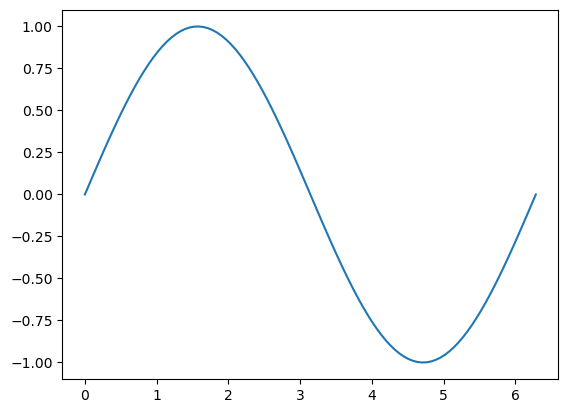

In [30]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x,y)
plt.show()

## np.identity(), np.eye()
- 지정한 크기의 정방 단위 행렬을 생성
    - 정방 행렬 : 행과 열의 크기가 같은 정사각형 행렬
    - 단위 행렬 : 주대각선의 원소가 모두 1이며 나머지 원소는 모두 0인 행렬

In [37]:
print(np.identity(2, dtype = 'int32'))
print(np.eye(3, 4)) # eye 함수는 행과 열의 크기가 다른 단위 행렬도 만들 수 있다.
print('-' * 30)
# 세 번째 값 : 양수 값은 위쪽 대각선(열)을 음수 값은 아래쪽 대각선(행)을 나타낸다.
print(np.eye(3, 4, 1))
print('-' * 30)
print(np.eye(3, 4, -1))

[[1 0]
 [0 1]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
------------------------------
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
------------------------------
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


# 배열의 변경

## np.reshape() / ndarray.reshape()
- `원본을 변경하지 않고 모양이 변경된 새로운 배열을 반환`

In [49]:
a = np.arange(6)
print(a)

b = a.reshape((3,2)) # np.reshape(a,(3,2))과 동일
print(b)
print(a) # 원본 배열은 모양이 변하지 않는다.
print('-'*30)
# 열의 크기를 2로 맞추고 행의 크기는 전체 요소 개수에 맞춰 알아서 지정한다.
c = np.reshape(a, (-1,2))  
print(c)
print('-'*30)
d = np.arange(1, 11).reshape(2, 5)
print(d)
print('-'*30)
e = d.reshape((-1, 2, 1))
print(e)
print('-'*30)
f = e.reshape(-1) # -1의 의미는 행렬의 값이 없으므로 요소를 한 줄로 나타내게 된다.
print(f)

[0 1 2 3 4 5]
[[0 1]
 [2 3]
 [4 5]]
[0 1 2 3 4 5]
------------------------------
[[0 1]
 [2 3]
 [4 5]]
------------------------------
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
------------------------------
[[[ 1]
  [ 2]]

 [[ 3]
  [ 4]]

 [[ 5]
  [ 6]]

 [[ 7]
  [ 8]]

 [[ 9]
  [10]]]
------------------------------
[ 1  2  3  4  5  6  7  8  9 10]


## ndarray.resize()
- 원본 배열을 새로운 모양의 배열로 변경한다.
- 대상 배열의 요소의 개수가 원래 배열과 동일하지 않으면 크기를 강제로 조정한다.

In [51]:
a = np.arange(12)
a.resize((3,4))
print(a)
print('-'*30)
a.resize((4,4)) # 원본과 크기가 달라도 오류가 발생하지 않는다.
print(a) 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
------------------------------
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [ 0  0  0  0]]


## ndarray.flatten() / ndarray.ravel()
- 배열을 1차원으로 만든다.
- flatten() : 배열을 복사해서 1차원으로 변경 -> **원본에 영향을 미치지 않는다.**
- ravel() : 원본을 복사하지 않는다. 따라서 값을 수정하면 원본 값도 수정된다.

In [55]:
import numpy as np

a = np.arange(1,5).reshape((2,2))
print(a)
print(a.flatten())
print(a)

[[1 2]
 [3 4]]
[1 2 3 4]
[[1 2]
 [3 4]]


In [61]:
b = a.ravel()
print(b)
# print(a)
b[0] = 10
print(a)

[10  2  3  4]
[[10  2]
 [ 3  4]]
[[10  2]
 [ 3  4]]


## np.expand_dims()
- 지정한 axis의 위치에 새로운 차원을 추가한다.

In [70]:
a = np.array([1,2])
print(a)
print(a.shape)
print('-'*30)
b = np.expand_dims(a, axis = 0)
print(b)
print(b.shape) 
print('-'*30)
c = np.expand_dims(a, axis = 1)
print(c)
print(c.shape)

[1 2]
(2,)
------------------------------
[[1 2]]
(1, 2)
------------------------------
[[1]
 [2]]
(2, 1)


In [75]:
a = np.arange(1, 7).reshape((2,3))
print(a)
print(a.shape)

b = np.expand_dims(a, axis = 0)
print(b)
print(b.shape)
print('-'*30)

c= np.expand_dims(a, axis = 1)
print(c)
print(c.shape)
print('-'*30)

d = np.expand_dims(a, axis = 2)
print(d)
print(d.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)
[[[1 2 3]
  [4 5 6]]]
(1, 2, 3)
------------------------------
[[[1 2 3]]

 [[4 5 6]]]
(2, 1, 3)
------------------------------
[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]]
(2, 3, 1)


- np.newaxis를 이용해서 차원을 늘릴 수도 있다.

In [78]:
a = np.arange(4)
print(a)

row_vect = a[np.newaxis, :] # 새로운 행 축 추가 
print(row_vect)

col_vect = a[:, np.newaxis] # 새로운 열 축 추가
print(col_vect)

[0 1 2 3]
[[0 1 2 3]]
[[0]
 [1]
 [2]
 [3]]


## np.astype() / ndarray.astype()
- 배열의 타입을 변경

In [80]:
a = np.arange(1,4)
print(a)
print(a.dtype)

a_float = a.astype('float32') # a.astype(np.float32)
print(a_float)
print(a_float.dtype)

[1 2 3]
int32
[1. 2. 3.]
float32


## np.squeeze()
- 차원 축소

In [88]:
a = np.arange(1,4).reshape((1,3,1))
print(a)
print(a.shape)
print('-'*30)

b = np.squeeze(a) # 축 옵션을 지정하지 않으면 1차원으로 변경
print(b)
print(b.shape)
print('-'*30)

c = np.squeeze(a, axis = 0)
print(c)
print(c.shape)

# 원본의 원소 개수와 일치되지 않아 ValueError를 발생
# d = np.squeeze(a, axis = 1)
# print(d)
# print(d.shape)

[[[1]
  [2]
  [3]]]
(1, 3, 1)
------------------------------
[1 2 3]
(3,)
------------------------------
[[1]
 [2]
 [3]]
(3, 1)


## np.concatenate()
- 두 개 이상의 배열을 연결한다.
- 배열을 연결하려면 차원 수가 같아야 한다.
- axis 인수를 설정하여 연결 방향을 정할 수 있다. (default:axis=0)

In [93]:
a = np.arange(1, 5).reshape((2,2))
print(a)
b = np.array([5,6])
print(b)

# c = np.concatenate((a,b)) # 차원 수가 다르기 때문에 에러
c = np.concatenate((a, np.expand_dims(b, axis = 0)))
print(c)

[[1 2]
 [3 4]]
[5 6]
[[1 2]
 [3 4]
 [5 6]]


In [95]:
e = np.concatenate((a, c.T), axis=1) # .T는 주대각선을 기준으로 전치
print(e)

[[1 2 1 3 5]
 [3 4 2 4 6]]


# 기본 연산
- 배열에 대한 산술 연산자는 **요소별(element-wise)**로 적용된다.

## 산술 연산

In [102]:
import numpy as np

# 덧셈
a = np.add(1.0, 4.0)
print(a)
print('-'*30)
a = np.arange(9.0).reshape((3,3))
print(a)
print('-'*30)
b = np.arange(3.0)
print(b)
print('-'*30)
print(np.add(a,b))

# 뺄셈
print(np.subtract(a,b)) # a - b
print('-'*30)

# 곱셈
print(np.multiply(a,b)) # a * b
print('-'*30)

# 나눗셈
print(np.divide(a,4))

5.0
------------------------------
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
------------------------------
[0. 1. 2.]
------------------------------
[[ 0.  2.  4.]
 [ 3.  5.  7.]
 [ 6.  8. 10.]]
[[0. 0. 0.]
 [3. 3. 3.]
 [6. 6. 6.]]
------------------------------
[[ 0.  1.  4.]
 [ 0.  4. 10.]
 [ 0.  7. 16.]]
------------------------------
[[0.   0.25 0.5 ]
 [0.75 1.   1.25]
 [1.5  1.75 2.  ]]


## 통계 연산
- 통계 연산은 axis와 밀접한 관계가 있다.
- 축 값을 입력하지 않으면 모든 원소에 대한 연산 결과를 출력한다.

### np.sum()

In [105]:
a = np.arange(12).reshape((3,4))
print(a)
print(a.sum()) # np.sum(a)
print(a.sum(axis = 0)) # 각 열의 합
print(a.sum(axis = 1)) # 각 행의 합
print(a.cumsum(axis=1)) # 각 행의 누적 합

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
66
[12 15 18 21]
[ 6 22 38]
[[ 0  1  3  6]
 [ 4  9 15 22]
 [ 8 17 27 38]]


### np.mean()
- 축을 따라 산술 평균을 계산

In [106]:
a = np.arange(1,10).reshape((3,3))
print(a)

# 위치인수를 주면 축 값으로 인식 
print(np.mean(a,0)) # 열 평균
print(np.mean(a, 1)) # 행 평균
print(np.mean(a)) # 모든 원소의 평균

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[4. 5. 6.]
[2. 5. 8.]
5.0


### np.average()
- 주어진 축에 따라 가중평균 계산
- avg = sum(a * weight) / sum(weight)

In [108]:
a = np.arange(6).reshape((3, 2))
print(a)
# 0.75 = sum(0*(1/4) + 1*(3/4)) / sum(1/4+3/4)
print(np.average(a, axis = 1, weights=[1/4, 3/4])) # weights는 각 열에 부여한 가중치

[[0 1]
 [2 3]
 [4 5]]
[0.75 2.75 4.75]


### np.max() / np.min()
- axis를 따른 배열의 최대/최소값 반환

### np.median()
- axis를 따른 배열의 중앙값 반환

### np.var() / np.std()
- axis를 따른 배열의 분산, 표준편차를 반환

### np.maximum()
- 두 개의 배열을 가져와 요소별 최대값 반환

In [109]:
a = np.array([3,6,1])
b = np.array([4,2,9])
print(np.maximum(a,b)) #  각 인덱스마다 3과 4, 6과 2, 1과 9를 비교

[4 6 9]


## 최소값, 최대값 아규먼트 위치
- np.argmax() : 제일 큰 값 위치 정보
- np.argmin() : 제일 작은 값 위치 정보
- np.where(조건) : 조건에 맞는 값 위치 정보
- np.where(조건, 조건에 맞을 때 값, 조건과 다를 때 )

In [112]:
import numpy as np
a = np.array([5,6,8,1,9,3,4,7])
print(np.argmax(a))
print(np.argmin(a))

4
3


In [114]:
print(np.where(a>5))
print(np.where(a>5,1,-1))
print(np.where(a>5, a, 0))

(array([1, 2, 4, 7], dtype=int64),)
[-1  1  1 -1  1 -1 -1  1]
[0 6 8 0 9 0 0 7]


## 비교 연산
- 연산자를 이용하여 요소별 비교

In [116]:
a = np.array([1,2,3])
b = np.array([1,2,3])
c = np.array([3,2,5])
print(a==b)
print(a==c)

[ True  True  True]
[False  True False]


In [119]:
a = np.arange(1, 10).reshape((3,3))
print(a)
result = a % 2 == 0
print(result)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[False  True False]
 [ True False  True]
 [False  True False]]


### all(), any()를 이용한 비교
- all() : 요소 전체가 같아야 하나의 True
- any() : 요소 전체중 하나만 같아도 True

In [123]:
a = np.array([1,2,3])
b = np.array([1,2,3])
c = np.array([3,2,5])

print(np.all(a == b))
print(np.all(a==c))

print(np.any(a == b))
print(np.any(a==c))

True
False
True
True


## 논리 연산
- np.logical_and(), np.logical_or(), np.logical_not(), np.logical_xor()

In [128]:
x = np.arange(1,11).reshape((2,5))
print('X 행렬:')
print(x)
print('-'*30)

y = x % 2 == 0
print('Y 행렬: 짝수면 True, 홀수면 False')
print(y)
print('-'*30)

z = x >= 4
print('Z 행렬: 4보다 크면 True, 작으면 False')
print(z)
print('-'*30)

print('Y and Z 행렬')
print(np.logical_and(y,z))
print('-'*30)
print('Y and Z 조건을 만족하는 요소')
print(x[np.logical_and(y,z)])
print('-'*30)
print('홀수이면서 4 이상인 요소')
print(x[np.logical_and(~y, z)]) # ~는 not(부정) 연산자

X 행렬:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
------------------------------
Y 행렬: 짝수면 True, 홀수면 False
[[False  True False  True False]
 [ True False  True False  True]]
------------------------------
Z 행렬: 4보다 크면 True, 작으면 False
[[False False False  True  True]
 [ True  True  True  True  True]]
------------------------------
Y and Z 행렬
[[False False False  True False]
 [ True False  True False  True]]
------------------------------
Y and Z 조건을 만족하는 요소
[ 4  6  8 10]
------------------------------
[5 7 9]


## 정렬

In [129]:
import numpy as np

np.random.seed(10)
data = np.random.randint(1, 50, 10) # 넘파이의 randint는 end 값을 포함하지 않음
print(data)

[10 37 16  1 29 26 30 49 30  9]


### np.sort()
- 데이터를 오름차순으로 정렬한다.
- 내림차순으로 정렬하는 별도의 옵션은 없다.

In [136]:
print(np.sort(data)[::-1])

[49 37 30 30 29 26 16 10  9  1]


### np.argsort()
- 오름차순으로 정렬한 데이터의 정렬 전 인덱스 값을 반환한다.

In [137]:
print(np.argsort(data))

[3 9 0 2 5 4 6 8 1 7]


[문제] 학생 이름과 점수 데이터를 이용하여 성적이 우수한 학생 순서로 이름을 출력하세요.

In [149]:
name = ['홍길동','저팔계','사오정','전우치','삼장법사']
score = [75, 100, 95, 56, 99]

name = np.array(name)
score = np.array(score)
sorted_idx = np.argsort(score)
print(name[sorted_idx][::-1])

['저팔계' '삼장법사' '사오정' '홍길동' '전우치']


# 행렬연산

## *연산자
- 형태(shape)가 동일한 두 행렬을 원소끼리 곱하는 연산자
- 교환법칙 성립: A * B == B * A

In [152]:
import numpy as np

a = np.array([[1,1],[0,1]])
b = np.array([[2,0],[3,4]])
print(a*b)
print(b*a) # 교환법칙 성립

[[2 0]
 [0 4]]
[[2 0]
 [0 4]]


## np.dot()
- 두 벡터의 내적을 계산하는 함수
    - 내적이란 벡터에서 서로 대응하는 성분끼리 곱한 다음 그것들을 모두 더한 것을 말하며, 내적 결과는 스칼라가 된다.
    - a·b 또는 <a,b>로 표현 : A1B1 + A2B2 + ... + AnBn
- 행렬곱에서도 사용 가능하다. 단, 공식 문서에서는 np.matmul() 사용을 권장
- 두 행렬의 행렬곱을 계산하기 위해서는 첫 번째 행렬의 열 크기와 두 번째 행렬의 행 크기가 같아야 한다.

In [153]:
# 내적계산
a = np.array([3,4,5,6,9])
b = np.array([8,6,1,3,4])
c = np.dot(a,b) # 3*8+4*6+5*1+6*3+9*4
print(c)

107


In [156]:
A = np.array([[1,1],[0,1]])
B =np.array([[2,0],[3,4]])
print(A)
print(B)
print('-' * 30)

print(np.dot(A, B)) # A.dot(B)
print(np.dot(B, A)) # 교환법칙이 성립하지 않는다.

[[1 1]
 [0 1]]
[[2 0]
 [3 4]]
------------------------------
[[5 4]
 [3 4]]
[[2 2]
 [3 7]]


## np.matmul() / @ 연산자 

In [158]:
A = np.array([[1,1],[0,1]])
B =np.array([[2,0],[3,4]])

print(A@B)

A = np.array([[1,0,3],[0,2,4]]) # 2x3
B = np.array([[4,1],[2,2],[2,3]]) # 3x2
print(np.matmul(A, B))

[[5 4]
 [3 4]]
[[10 10]
 [12 16]]


## dot()과 matmul()의 차이
- dot()은 행렬과 상수의 곱셈이 가능, matmul()은 에러 발생
- 3차원 이상의 행렬곱(Tensor Multiplication)을 수행할 경우 결과가 다르다.

## 전치(Transpose)
- 전치는 기존 행렬의 행과 열을 교환하는 것
- 주대각선을 기준으로 반사 대칭하는 것을 말한다.
- np.transporse() 함수 또는 ndarray.T 속성을 사용한다.

In [159]:
a = np.arange(1,5).reshape((2,2))
b = a.T
c = np.transpose(a)

print(a)
print('-'*30)
print(b)
print('-'*30)
print(c)

[[1 2]
 [3 4]]
------------------------------
[[1 3]
 [2 4]]
------------------------------
[[1 3]
 [2 4]]


# 인덱싱, 슬라이싱, 반복

## 인덱싱

In [165]:
import numpy as np

a_list = [[1,2,3,4,5],[6,7,8,9,10]]
print(a_list[0][0])
# print(a_list[0, 0]) # 파이썬에서는 안됨

a_ndarray = np.array(a_list)
print(a_ndarray[0][0])
print(a_ndarray[0,0]) # 행과 열을 동시에

1
1
1


## Boolean Indexing (masking)

In [173]:
a = np.arange(1, 25).reshape((4,6))
print(a)
print('-'*30)
# a 배열에서 요소의 값이 짝수인 요소들의 총 합은?
even_arr = a % 2 == 0
print(even_arr)
print(a[even_arr]) # True에 해당하는 값만 나옴
print('-'*30)
print(np.sum(a[even_arr]))
print(np.sum(a[a%2==0]))
print('-'*30)
print(np.sum(even_arr)) # True의 개수

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]]
------------------------------
[[False  True False  True False  True]
 [False  True False  True False  True]
 [False  True False  True False  True]
 [False  True False  True False  True]]
[ 2  4  6  8 10 12 14 16 18 20 22 24]
------------------------------
156
156
------------------------------
12


## Fancy Indexing
- 배열의 각 요소 선택을 `인덱스 배열을 전달하여` 참조하는 방식
- 즉, 정수나 boolean 값을 가지는 다른 배열로 원본 배열의 값을 인덱싱하는 것을 의미한다.
- Fancy Indexing은 복사본이 생성된다. 

In [181]:
a = np.arange(15).reshape((5,3))
print(a)
print('-'*30)

print('0행, 2행만 인덱싱')
print(a[[0,2],:])
print('-'*30)

print('전체 행에 대해 0열, 2열만 인덱싱')
print(a[:,[0,2]])
print('-'*30)

print('정수 배열 [1,2]를 이용한 인덱싱') # 배열만 넣어주면 행의 값을 의미
print(a[[1,2]])
print('-'*30)

print('두 번 인덱싱')
print(a[[0,2,4]][:,[0,2]]) # 0,2,4행에서 다시 0,2열 추출

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
------------------------------
0행, 2행만 인덱싱
[[0 1 2]
 [6 7 8]]
------------------------------
전체 행에 대해 0열, 2열만 인덱싱
[[ 0  2]
 [ 3  5]
 [ 6  8]
 [ 9 11]
 [12 14]]
------------------------------
정수 배열 [1,2]를 이용한 인덱싱
[[3 4 5]
 [6 7 8]]
------------------------------
두 번 인덱싱
[[ 0  2]
 [ 6  8]
 [12 14]]


In [185]:
# 팬시 인덱싱은 복사본이 생성된다.
a = np.arange(15).reshape((5,3))
print(a)
print('-'*30)

copied = a[[0,2,4]][:,[0,2]]
print(copied)
print('-'*30)
# 값 수정
copied[0,:] = 100
print(copied)
print('-'*30)
print(a)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
------------------------------
[[ 0  2]
 [ 6  8]
 [12 14]]
------------------------------
[[100 100]
 [  6   8]
 [ 12  14]]
------------------------------
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


## 슬라이싱
- ndarray[행 슬라이싱 시작:행 슬라이싱 끝, 열 슬라이싱 시작:열 슬라이싱 끝]
- numpy에서 슬라이싱은 동일한 메모리 영역의 뷰를 반환한다.
- 즉, 뷰를 수정하면 원본 데이터도 변경된다.

In [188]:
a = np.arange(1, 13).reshape((3,4))
print(a)
print('-'*30)

print(a[0:2, 0:4])
print('-'*30)

print(a[:2, :]) # 위와 동일
print('-'*30)

print(a[:2])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
------------------------------
[[1 2 3 4]
 [5 6 7 8]]
------------------------------
[[1 2 3 4]
 [5 6 7 8]]
------------------------------
[[1 2 3 4]
 [5 6 7 8]]


In [191]:
a_view = a[:1]
print(a_view)
print('-'*30)
a_view[0] = [9, 10, 11, 12]
print(a)

[[ 9 10 11 12]]
------------------------------
[[ 9 10 11 12]
 [ 5  6  7  8]
 [ 9 10 11 12]]


[문제] 슬라이싱 실습

In [239]:
import numpy as np

origin = np.arange(1, 25).reshape((4,6))
print(origin)
print('-'*30)

# 1. 가운데 요소 가져오기
print(origin[1:3, 1:5])
print('-'*30)
# 2. 0~1 행과 모든 열 가져오기
print(origin[:2])
print('-'*30)
# 3. 전체 행, 1,2열 가져오기
print(origin[:,1:3])
print('-'*30)
# 4. 1행과 0,1열 가져오기
print(origin[1:2,0:2])
print('-'*30)
# 5. 각 행의 마지막 열 데이터만 추출해서 2차원 열벡터로 변경하기
print(origin[:,-1].reshape((-1,1))) # -1 : 행을 알아서 맞춰라

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]]
------------------------------
[[ 8  9 10 11]
 [14 15 16 17]]
------------------------------
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
------------------------------
[[ 2  3]
 [ 8  9]
 [14 15]
 [20 21]]
------------------------------
[[7 8]]
------------------------------
[[ 6]
 [12]
 [18]
 [24]]


## 인덱싱 & 슬라이싱 그리고 차원
- 정수 인덱싱과 슬라이싱을 혼합해서 사용하면 낮은 차원의 배열이 생성되지만
- 슬라이싱만 사용하면 원본 배열과 같은 차원의 배열이 생성된다.

In [242]:
a = np.arange(1, 13).reshape((3,4))
print(a, a.shape, a.ndim)
print('-'*30)

print('슬라이싱 이용')
b = a[:1,:]
print(b, b.shape, b.ndim)
print('-'*30)

print('인덱싱만 사용')
c = a[0]
print(c, c.shape, c.ndim)
print('-'*30)

print('인덱싱 & 슬라이싱 혼합 사용')
d = a[0,:]
print(d, d.shape, d.ndim)
print('-'*30)

print('팬시 인덱싱(<--> 정수 인덱싱) 사용')
# 팬시 인덱싱을 사용하면 원본 배열과 동일한 차원의 배열이 생성된다.
print(a[[0,2],:])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] (3, 4) 2
------------------------------
슬라이싱 이용
[[1 2 3 4]] (1, 4) 2
------------------------------
인덱싱만 사용
[1 2 3 4] (4,) 1
------------------------------
인덱싱 & 슬라이싱 혼합 사용
[1 2 3 4] (4,) 1
------------------------------
팬시 인덱싱(<--> 정수 인덱싱) 사용
[[ 1  2  3  4]
 [ 9 10 11 12]]


# Broadcasting
- shape이 다른 numpy 배열이 연산을 하려고 할 때 특정 조건이 만족되면 자동으로 연산이 가능한 형태로 변환되는 것
- numpy에서 vector나 matrix 간에 연산을 하면 같은 위치의 원소끼리 계산이 이뤄진다.
- 이렇게 되려면 계산하려는 vector나 matrix가 형태가 같아야 하는데, 이 때 shape이 맞춰지는 것을 broadcasting이라고 한다.
![broad](broadcasting.png)

# random 모듈

## np.random.rand
- 0 이상 1 미만의 균등 분포 난수 생성
- shape을 전달하면 그 크기에 맞는 다차원 배열을 생성한다.

In [243]:
a = np.random.rand() # 난수 1개 생성
print(a)
b = np.random.rand(3) # 1차원 벡터 생성
print(b)
c = np.random.rand(3,4) # 2차원 행렬 생성
print(c)

0.265566126772097
[0.26360285 0.15037787 0.68381843]
[[0.81660184 0.33607158 0.89081653 0.19812181]
 [0.03061665 0.87761494 0.72743551 0.54088093]
 [0.13145815 0.41366737 0.77872881 0.58390137]]


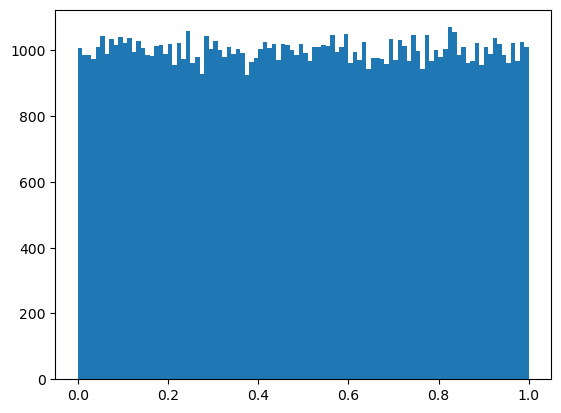

In [244]:
import matplotlib.pyplot as plt

np.random.seed(0)
a = np.random.rand(100000)
plt.hist(a, bins = 100)
plt.show()

## np.random.randint()
- 주어진 범위의 균등분포의 임의의 정수 난수 발생

In [246]:
a = np.random.randint(3) #[0,3) 범위의 임의의 정수 1개 생성
print(a)

b = np.random.randint(1,5) # [1, 5) 범위의 임의의 정수 1개 생성
print(b)

c = np.random.randint(1,5, size = 3) #[1, 5) 범위의 임의의 정수 3개 생성
print(c)

d = np.random.randint(1,5, size = (3,3)) #[1, 5) 범위의 임의의 정수 3x3개 생성
print(d)

0
2
[4 4 3]
[[2 1 3]
 [1 3 1]
 [3 1 3]]


## np.random.randn()
- 표준정규분포(평균은 0, 표준편차는 1로 이루어진 데이터)로부터 샘플링된 난수를 발생한다.

In [248]:
a = np.random.randn() # 난수 1개 발생
print(a)

b = np.random.randn(3) # 1차원 배열 생성
print(b)

c = np.random.randn(3,4) # 3x4 2차원 배열 생성
print(c)

-0.014852827689607086
[ 0.11753585 -0.0526958   0.26225629]
[[-0.15627998 -0.53984546 -0.17530963 -0.29539932]
 [ 0.75554217  1.2514908   0.20408971 -0.2416629 ]
 [ 0.58080533 -0.98996209  0.8214335   1.11976663]]


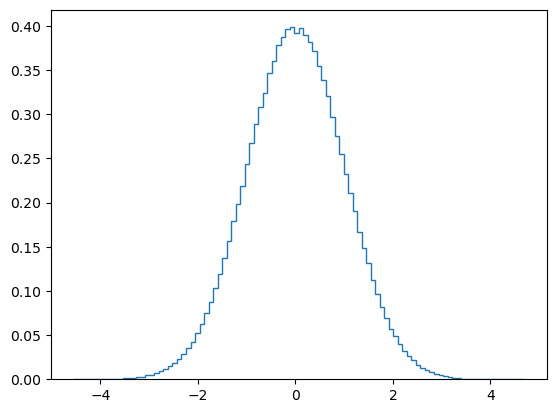

0.9993848056698224 0.0006142354818026183


In [253]:
a = np.random.randn(1000000)
plt.hist(a, bins=100, density = True, histtype='step')
plt.show()
print(np.std(a), np.mean(a))

## np.random.choice()
- 주어진 1차원 행렬에서 랜덤으로 샘플링한다.
- replace = False 중복 샘플링을 하지 않는다. (default는 replace=True)

In [255]:
np.random.seed(10)
data = np.random.randint(1, 101, 10)
r = np.random.choice(data, size = (3,), replace = False)
print(r)

[16 94 65]
